In [1]:
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
r=requests.get("https://www.macrotrends.net/1369/crude-oil-price-history-chart")

In [3]:
r.text[:500]

'\n\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t\t\t\r\n\t\t<link rel="shortcut icon" href="/assets/images/icons/FAVICON/macro-trends_favi'

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup=BeautifulSoup(r.text,"html.parser")

In [6]:
result=soup.find_all('td',attrs={"style":"text-align:center"})

In [7]:
year=[]
for years in result:
    yrs=years.text
    year.append(yrs)

In [8]:
year

['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987']

In [9]:
close_price = soup.find_all('td',attrs={'style':'text-align:center;'})

In [10]:
close_price

[<td style="text-align:center;">$97.10</td>,
 <td style="text-align:center;">$76.08</td>,
 <td style="text-align:center;">$123.70</td>,
 <td style="text-align:center;">$76.08</td>,
 <td style="text-align:center;">$87.52</td>,
 <td style="text-align:center;">$68.17</td>,
 <td style="text-align:center;">$47.62</td>,
 <td style="text-align:center;">$84.65</td>,
 <td style="text-align:center;">$47.62</td>,
 <td style="text-align:center;">$75.21</td>,
 <td style="text-align:center;">$39.68</td>,
 <td style="text-align:center;">$61.17</td>,
 <td style="text-align:center;">$63.27</td>,
 <td style="text-align:center;">$11.26</td>,
 <td style="text-align:center;">$48.52</td>,
 <td style="text-align:center;">$56.99</td>,
 <td style="text-align:center;">$46.31</td>,
 <td style="text-align:center;">$66.24</td>,
 <td style="text-align:center;">$46.31</td>,
 <td style="text-align:center;">$61.14</td>,
 <td style="text-align:center;">$65.23</td>,
 <td style="text-align:center;">$60.37</td>,
 <td styl

In [11]:
p=[]
for i in close_price:
    data=i.text.strip()
    p.append(data)

In [12]:
type(p)

list

In [13]:
close_price[4].text

'$87.52'

In [14]:
prices = []
for i in range(len(p)):
    childlist=p[:5]
    del p[:5]
    
    if (len(childlist)==5):
        prices.append(childlist)

In [15]:
prices

[['$97.10', '$76.08', '$123.70', '$76.08', '$87.52'],
 ['$68.17', '$47.62', '$84.65', '$47.62', '$75.21'],
 ['$39.68', '$61.17', '$63.27', '$11.26', '$48.52'],
 ['$56.99', '$46.31', '$66.24', '$46.31', '$61.14'],
 ['$65.23', '$60.37', '$77.41', '$44.48', '$45.15'],
 ['$50.80', '$52.36', '$60.46', '$42.48', '$60.46'],
 ['$43.29', '$36.81', '$54.01', '$26.19', '$53.75'],
 ['$48.66', '$52.72', '$61.36', '$34.55', '$37.13'],
 ['$93.17', '$95.14', '$107.95', '$53.45', '$53.45'],
 ['$97.98', '$93.14', '$110.62', '$86.65', '$98.17'],
 ['$94.05', '$102.96', '$109.39', '$77.72', '$91.83'],
 ['$94.88', '$91.59', '$113.39', '$75.40', '$98.83'],
 ['$79.48', '$81.52', '$91.48', '$64.78', '$91.38'],
 ['$61.95', '$46.17', '$81.03', '$34.03', '$79.39'],
 ['$99.67', '$99.64', '$145.31', '$30.28', '$44.60'],
 ['$72.34', '$60.77', '$99.16', '$50.51', '$95.95'],
 ['$66.05', '$63.11', '$77.05', '$55.90', '$60.85'],
 ['$56.64', '$42.16', '$69.91', '$42.16', '$61.06'],
 ['$41.51', '$33.71', '$56.37', '$32.49

In [16]:
import pandas as pd
df=pd.DataFrame(prices,columns=["Average Closing Price","Year Open","Year High","Year Low","Year Close"])
df.head()

,Average Closing Price,Year Open,Year High,Year Low,Year Close
0,$97.10,$76.08,$123.70,$76.08,$87.52
1,$68.17,$47.62,$84.65,$47.62,$75.21
2,$39.68,$61.17,$63.27,$11.26,$48.52
3,$56.99,$46.31,$66.24,$46.31,$61.14
4,$65.23,$60.37,$77.41,$44.48,$45.15


In [17]:
df.insert(0,"Year",year,True)

In [18]:
df.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Close
0,2022,$97.10,$76.08,$123.70,$76.08,$87.52
1,2021,$68.17,$47.62,$84.65,$47.62,$75.21
2,2020,$39.68,$61.17,$63.27,$11.26,$48.52
3,2019,$56.99,$46.31,$66.24,$46.31,$61.14
4,2018,$65.23,$60.37,$77.41,$44.48,$45.15


In [19]:
df.to_csv("Crude_oil_prices.csv",index=False)

In [20]:
df1=pd.read_csv("Crude_oil_prices.csv")

In [21]:
df1.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Close
0,2022,$97.10,$76.08,$123.70,$76.08,$87.52
1,2021,$68.17,$47.62,$84.65,$47.62,$75.21
2,2020,$39.68,$61.17,$63.27,$11.26,$48.52
3,2019,$56.99,$46.31,$66.24,$46.31,$61.14
4,2018,$65.23,$60.37,$77.41,$44.48,$45.15


In [22]:
df1.dtypes

Year                      int64
Average Closing Price    object
Year Open                object
Year High                object
Year Low                 object
Year Close               object
dtype: object

In [23]:
df1['Year Open'][0]

'$76.08'

In [24]:
df1['Year Open']=df1['Year Open'].str.replace("$","")
df1['Average Closing Price']=df1['Average Closing Price'].str.replace("$","")
df1['Year High']=df1['Year High'].str.replace("$","")
df1['Year Low']=df1['Year Low'].str.replace("$","")
df1['Year Close']=df1['Year Close'].str.replace("$","")

In [25]:
df1.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Close
0,2022,97.10,76.08,123.70,76.08,87.52
1,2021,68.17,47.62,84.65,47.62,75.21
2,2020,39.68,61.17,63.27,11.26,48.52
3,2019,56.99,46.31,66.24,46.31,61.14
4,2018,65.23,60.37,77.41,44.48,45.15


In [26]:
df1.dtypes

Year                      int64
Average Closing Price    object
Year Open                object
Year High                object
Year Low                 object
Year Close               object
dtype: object

In [27]:
#df1['Average Closing Price']=df1['Average Closing Price'].astype(float) 
col=['Average Closing Price','Year Open','Year High','Year High','Year Low','Year Close']
for i in col:
    df1[i]=df1[i].astype(float)

In [28]:
df1.dtypes

Year                       int64
Average Closing Price    float64
Year Open                float64
Year High                float64
Year Low                 float64
Year Close               float64
dtype: object

In [29]:
df1.describe()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Close
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2004.500000,47.035833,44.378611,58.781667,33.731111,45.942222
std,10.535654,28.930570,27.965360,35.796366,21.913916,28.123786
min,1987.000000,14.420000,12.420000,17.930000,10.820000,12.140000
25%,1995.750000,20.602500,19.730000,26.550000,16.957500,19.855000
50%,2004.500000,40.595000,35.260000,55.190000,25.720000,40.245000
75%,2013.250000,66.580000,60.870000,81.935000,46.637500,61.080000
max,2022.000000,99.670000,102.960000,145.310000,86.650000,98.830000


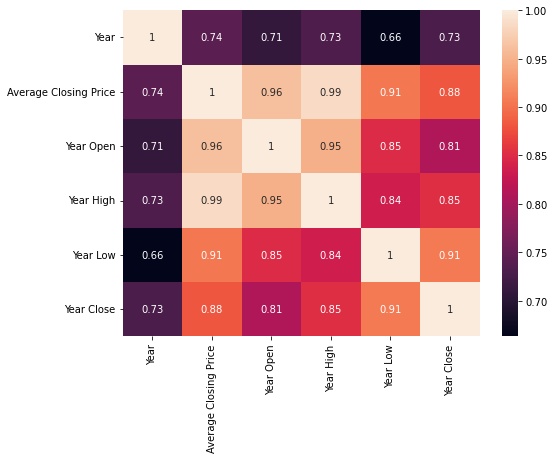

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True)
plt.show()

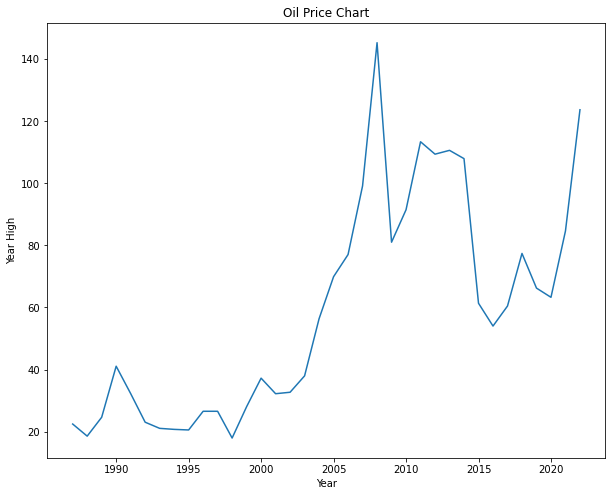

In [31]:
# Time vs Price line plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.lineplot(data=df1, x = 'Year', y = 'Year High')
plt.title('Oil Price Chart')
plt.show()

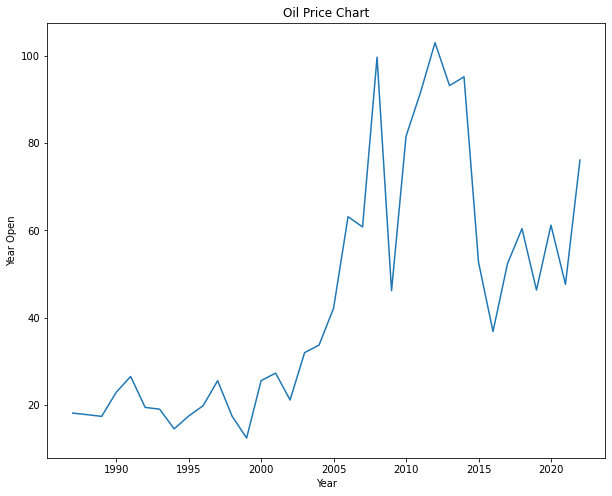

In [32]:
# Chart for opening oil price w.r.t years
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.lineplot(data=df1, x = 'Year', y = 'Year Open')
plt.title('Oil Price Chart')
plt.show()

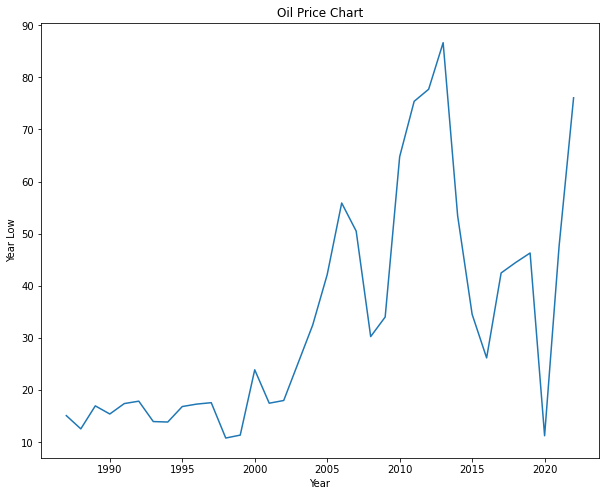

In [33]:
# Lower oil price as per year
plt.figure(figsize = (10,8))
sns.lineplot(data=df1, x = 'Year', y = 'Year Low')
plt.title('Oil Price Chart')
plt.show()

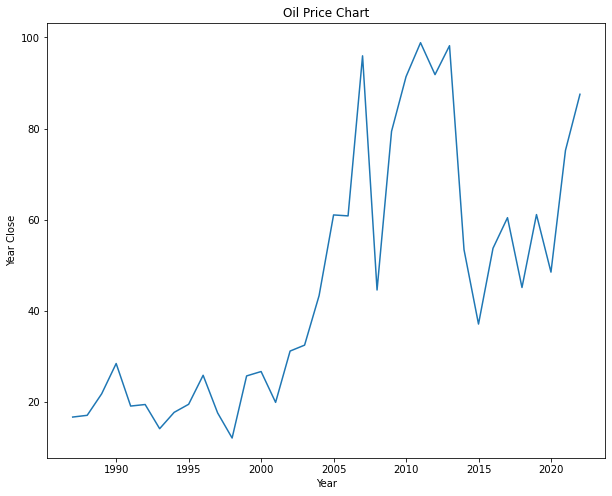

In [34]:
# Final closing crude oil price w.r.t year
plt.figure(figsize = (10,8))
sns.lineplot(data=df1, x = 'Year', y = 'Year Close')
plt.title('Oil Price Chart')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
df1.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Close
0,2022,97.10,76.08,123.70,76.08,87.52
1,2021,68.17,47.62,84.65,47.62,75.21
2,2020,39.68,61.17,63.27,11.26,48.52
3,2019,56.99,46.31,66.24,46.31,61.14
4,2018,65.23,60.37,77.41,44.48,45.15


In [37]:
x=df1[['Year','Average Closing Price','Year Open','Year High','Year Low']]
y=df1['Year Close']

In [38]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
pd.DataFrame(lr.coef_, x.columns,columns=['coeff'])

,coeff
Year,0.120252
Average Closing Price,0.505608
Year Open,-0.704665
Year High,0.210235
Year Low,1.001076


In [41]:
y_pred = lr.predict(x_test)

In [42]:
print(y_test)
print(y_pred)

31    19.15
20    31.21
16    60.85
30    19.49
22    26.72
15    95.95
10    91.83
2     48.52
Name: Year Close, dtype: float64
[20.5322054  28.69228271 66.99383558 23.69233062 34.29941103 71.19576644
 82.43391606  9.12646462]


In [43]:
# To check prediction for 2023 year
a=[[2023,95.77,83.46,119.24,65.76]]
a_pred=lr.predict(a)

In [44]:
a_pred

array([88.46525163])

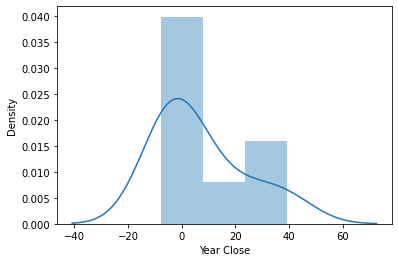

In [45]:
sns.distplot((y_test-y_pred));

In [46]:
from sklearn.tree import DecisionTreeRegressor
pr = DecisionTreeRegressor(max_depth = 4)
pr # it shows the default parameters

DecisionTreeRegressor(max_depth=4)

In [47]:
pr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [48]:
pred = pr.predict(x_test)

In [49]:
print(y_test)
print(pred)

31    19.15
20    31.21
16    60.85
30    19.49
22    26.72
15    95.95
10    91.83
2     48.52
Name: Year Close, dtype: float64
[18.805 25.495 53.45  17.072 32.51  53.45  98.83  53.75 ]


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# fit the model
model = RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(x_train, y_train)
# make predictions
R_predict = model.predict(x_test)

In [52]:
print (R_predict)
print(y_test)

[22.5157 23.9339 56.6851 18.8519 28.1297 61.4006 94.0128 43.5494]
31    19.15
20    31.21
16    60.85
30    19.49
22    26.72
15    95.95
10    91.83
2     48.52
Name: Year Close, dtype: float64
